# Statistics 447b Project

In [1]:
library(tidyverse)
library(ggmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [2]:
DatasetPath <- "./train.csv"

In [3]:
training <- read.csv(DatasetPath)

In [4]:
head(training)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,⋯,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1921357,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
2,1921358,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
3,1921359,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
4,1921360,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
5,1921361,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta
6,1921362,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,2,0,⋯,0,0,0,0,0,0,0,0,0,Atlanta


In [12]:
# remove near zer values for "TimeFromFirstStop"
training <- training %>% filter(TimeFromFirstStop_p50 > 10)

In [13]:
boundingBox <- function (dataset) {
    c(
        left = min(dataset$Longitude), 
        bottom = min(dataset$Latitude), 
        right = max(dataset$Longitude), 
        top = max(dataset$Latitude)
    )
}

In [14]:
generate_map <- function (dataset) {
    u <- unique(dataset$City)
    for (city in u) {
        ccity_dataset <- dataset %>% filter(City == city)
        cbox <- boundingBox(ccity_dataset)
        print(
            get_stamenmap(cbox, zoom = 10, maptype = "toner-lite") %>% ggmap() +
            geom_point(data = dataset, mapping = aes(
                x = Longitude, 
                y = Latitude,
                col = TimeFromFirstStop_p50
            )) + 
            scale_color_distiller(palette = "YlOrRd", direction = 1)
        )
    }
}

Warning message:
“Removed 216882 rows containing missing values (geom_point).”
Warning message:
“Removed 213547 rows containing missing values (geom_point).”


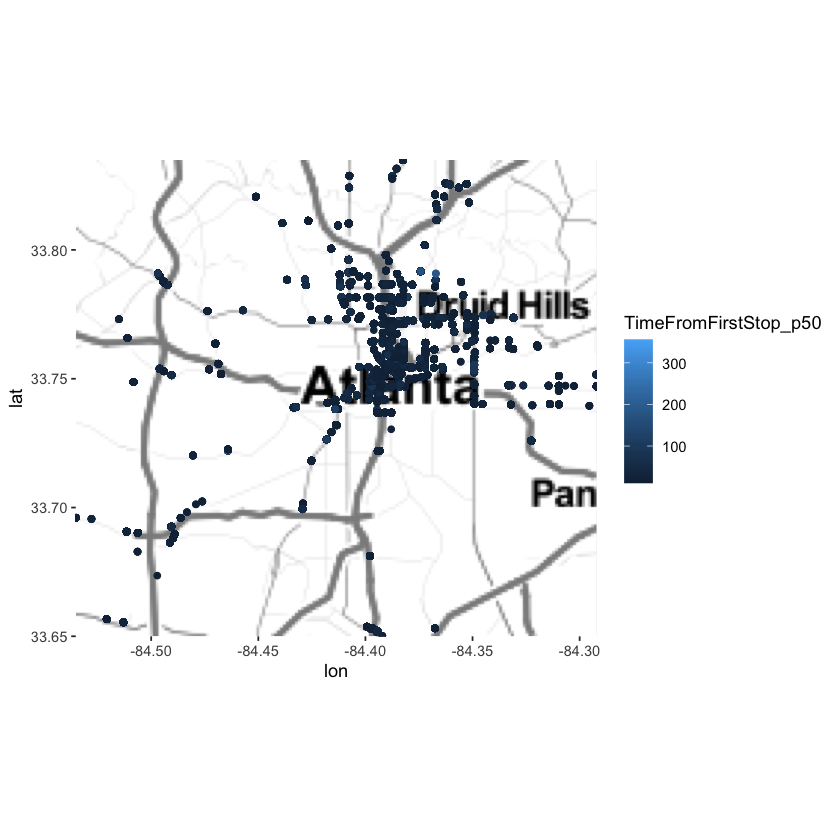

Warning message:
“Removed 229440 rows containing missing values (geom_point).”


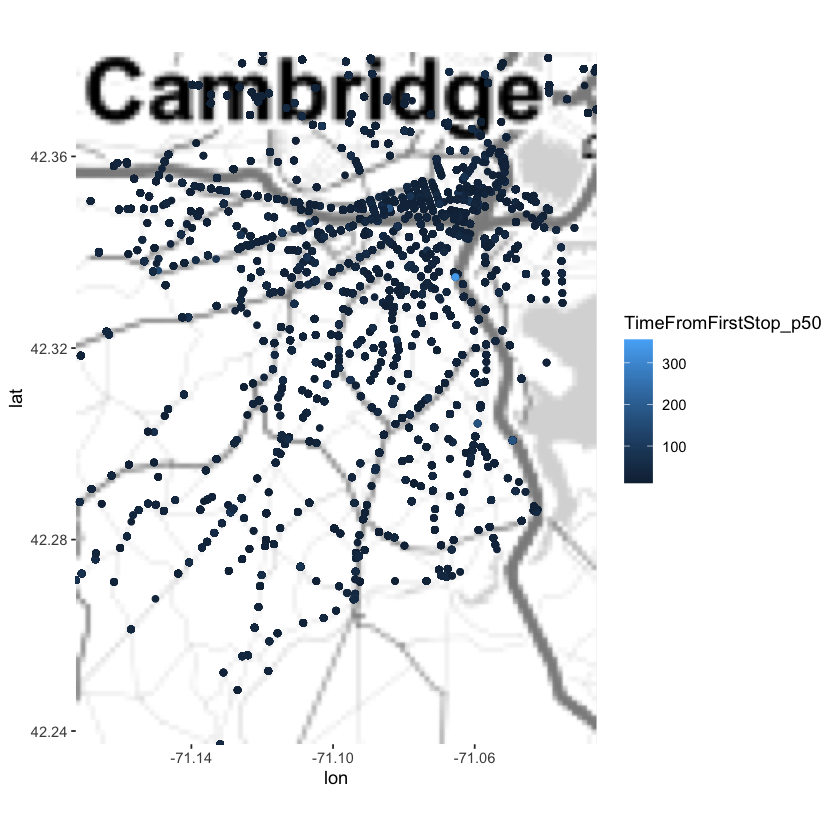

Warning message:
“Removed 149135 rows containing missing values (geom_point).”


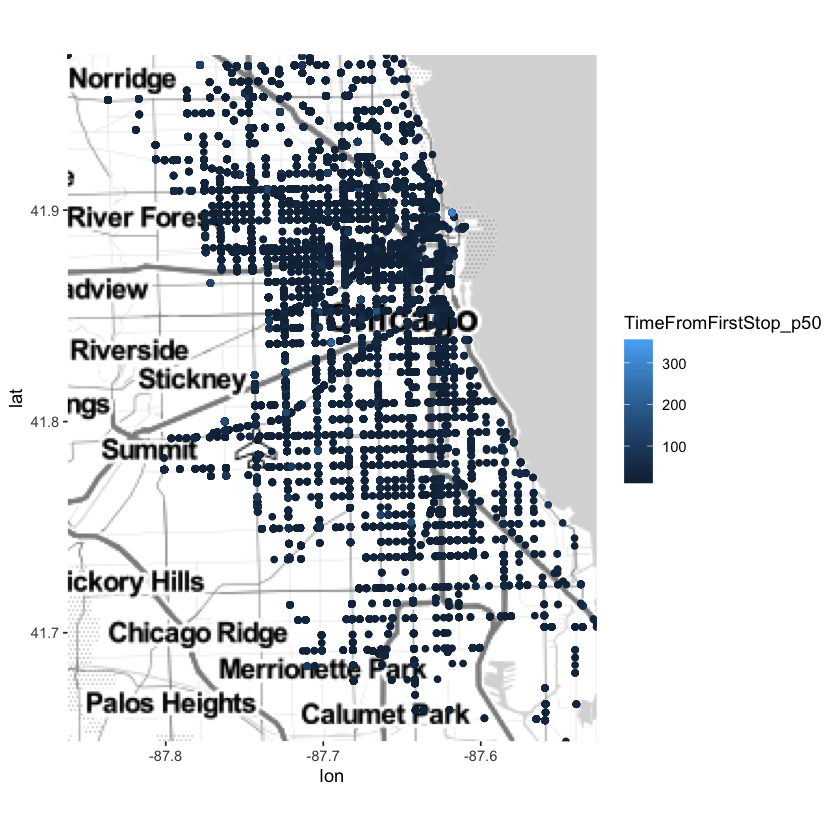

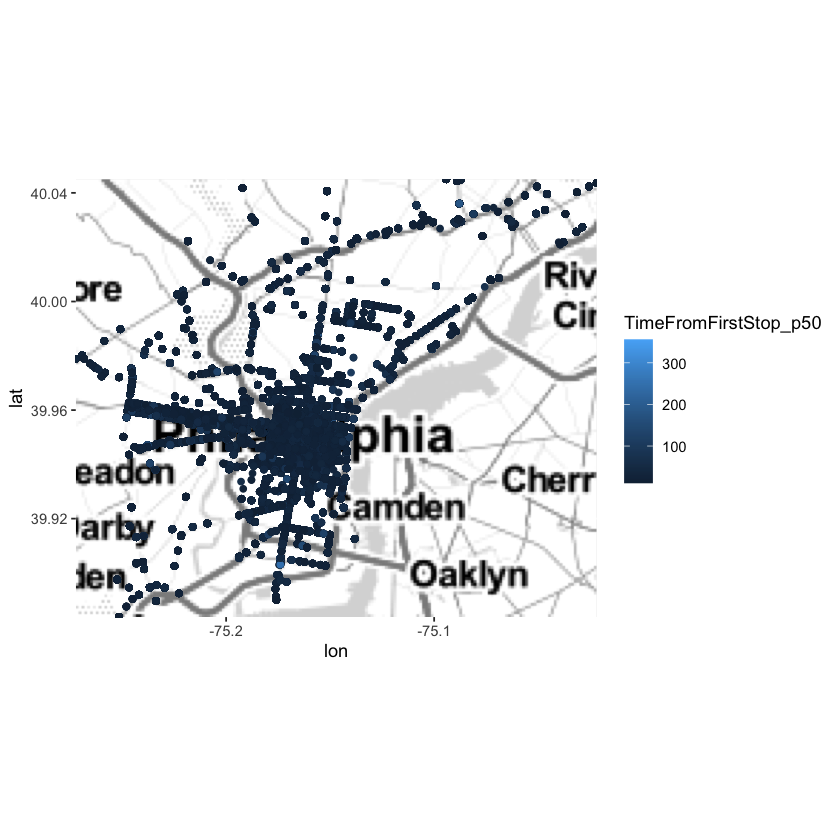

In [15]:
generate_map(training)

In [1]:
# remove missing values

In [2]:
# transform variables

In [3]:
# pairwise scatter plots

In [4]:
# boxplots

In [6]:
# correlation table

# co - lineararity

In [ ]:
total time stopped
all three cases 20, 50, 80



In [ ]:
# Left turn, right turn, straight through, feature engineering column...

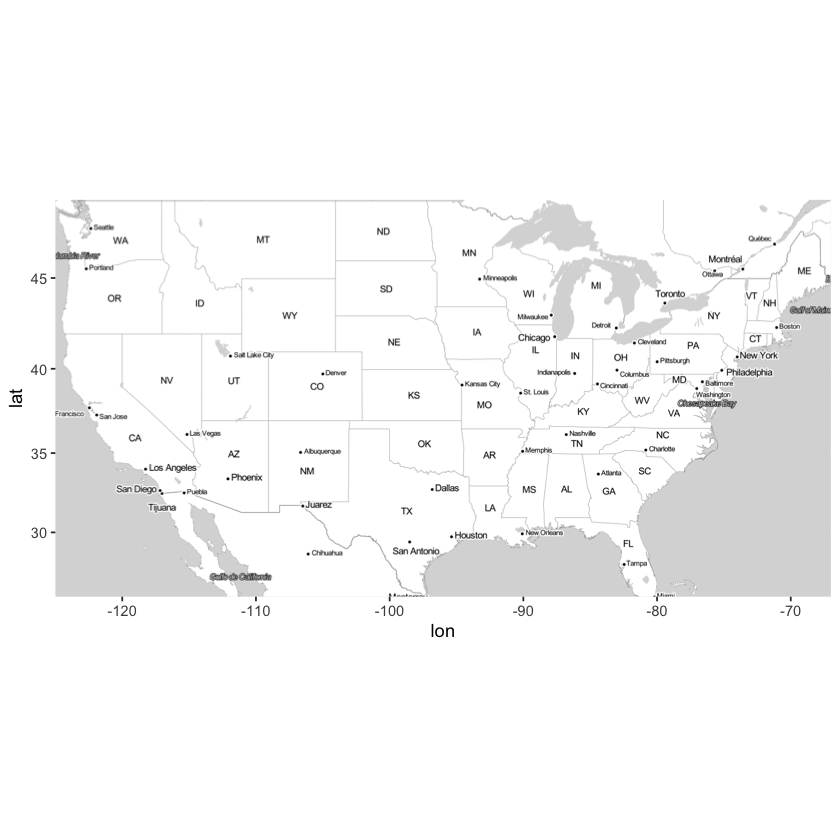

In [26]:

us <- c(left = -125, bottom = 25.75, right = -67, top = 49)
get_stamenmap(us, zoom = 5, maptype = "toner-lite") %>% ggmap()

In [23]:
a

676x1319 toner-lite map image from Stamen Maps. 
See ?ggmap to plot it.

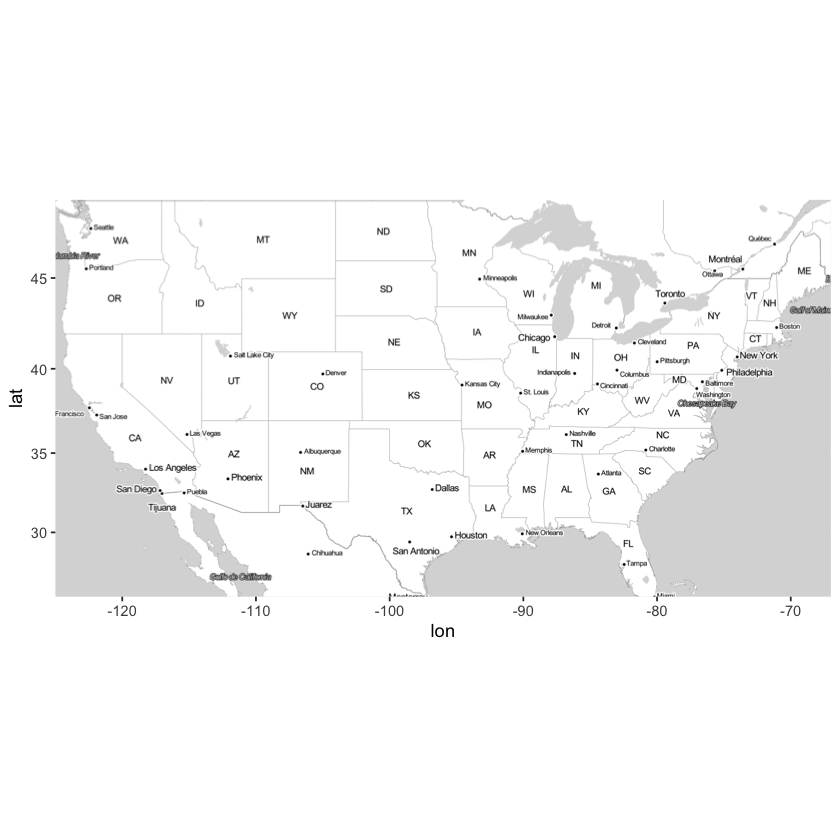

In [25]:
ggmap(a)